<a href="https://colab.research.google.com/github/MicroprocessorX069/Image-morphology-segmentation-and-Hough-transform/blob/master/ImageMorphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
def convolution11(input_image, kernel,threshold):
  
  w_input=len(input_image[0])
  h_input=len(input_image)
  input_image=np.array(input_image)
  padded_input=pad_image(input_image,int((len(kernel)-1)/2),int((len(kernel[0])-1)/2))
  padded_input=np.array(padded_input)
  kernel=flip(kernel)
  sum_kernel=np.sum(kernel)
  new_image=np.zeros((len(input_image)+1,len(input_image[0])+1))

  for input_x in range(0,h_input):
    for input_y in range(0,w_input):
        new_image[input_x,input_y]=0
        sum_img=0
        for kernel_x in range(0,len(kernel)):
           for kernel_y in range(0,len(kernel[0])):
              new_image[input_x,input_y]=int(new_image[input_x,input_y]) + int(padded_input[input_x+kernel_x, input_y+kernel_y])*int(kernel[kernel_x,kernel_y])
        
        if new_image[input_x,input_y]>= threshold:
          new_image[input_x,input_y]=0
        else:
          new_image[input_x,input_y]=1
        
 
  return(new_image)

def flip(matrix):
  new_matrix=np.zeros((matrix.shape))
  matrix=np.array(matrix)
  l=len(matrix)
  for i in range(l):
    for j in range(l):
      new_matrix[i,j]=matrix[l-i-1,l-j-1]
  return(new_matrix)

def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         if input_image[x,y]==1:
            input_image[x,y]=0
         else:
            input_image[x,y]=1
          
  return(input_image)

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y*2,image_x+pad_x*2))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(pad_y,image_y+pad_y):
    for j in range(pad_x, image_x+pad_x):
      padded_image[i,j]=image[i-pad_y,j-pad_x]
  return(padded_image)

def threshold(input_image,threshold):
  w=len(input_image[0])
  h=len(input_image)
  input_image=np.array(input_image)
  
  for x in range(h):
    for y in range(w):
      if input_image[x,y]>= threshold:
        input_image[x,y]=1
      else:
        input_image[x,y]=0
  return list(input_image)

def erode(input_image,kernel):
  w_kernel=len(kernel[0])
  new_image=convolution11(input_image,kernel,1)
  return(new_image)
def dilate(input_image,kernel):
  w_kernel=len(kernel[0])
  new_image=convolution11(input_image,kernel,w_kernel)
  return(new_image)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#black =0
#white=1
kernel=np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]])
input_image=cv2.imread("noise.jpg",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
input_image=[[]]
input_image=np.array(threshold(input_image,150))

#converting grayscale image to binary

f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(negative(input_image))
axarr[0,1].imshow(negative(erode(input_image,kernel)))
axarr[1,0].imshow(dilate(erode(input_image,kernel),kernel))
axarr[1, 1].imshow(erode(dilate(dilate(erode(input_image,kernel),kernel),kernel),kernel))
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)

plt.show()


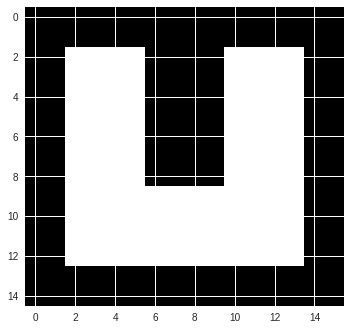

In [0]:
input_image=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
plt.imshow(input_image)

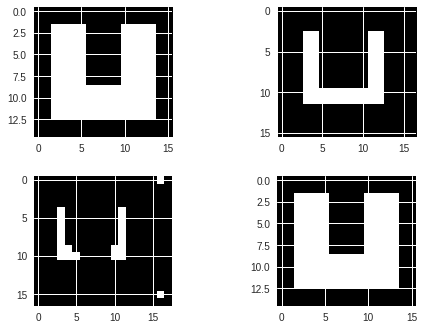

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#black =1
#white=0
kernel=np.array([[1,0,1],[0,0,0],[1,0,1]])
kernel2=np.array([[1,1,1],[1,0,0],[1,1,1]])
#kernel=np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]])

input_image=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

input_image=np.array(input_image)


f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(input_image)
axarr[0,1].imshow(negative(erode(input_image,kernel)))
axarr[1,0].imshow(negative(dilate(negative(erode(input_image,kernel)),kernel2)))
axarr[1, 1].imshow(input_image)
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)

plt.show()
